In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('placement.csv')

In [32]:
df.shape

(100, 4)

In [33]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [34]:
df = df.drop(columns = ['Unnamed: 0'])

In [35]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [36]:
df.shape

(100, 3)

In [37]:
import plotly.express as px
import plotly.graph_objects as go

In [38]:
fig = px.scatter_3d(df , x = 'cgpa' , y='iq' ,  z = 'placement')

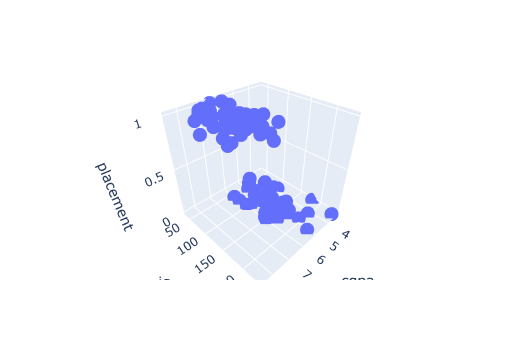

In [39]:
fig.show()

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x = df.iloc[:,0:2]
y = df.iloc[: , -1]

In [42]:
x.head()

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0


In [43]:
x_train , x_test , y_train , y_test = train_test_split(x , y ,test_size = 0.2 , random_state=2)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(x_train , y_train)

LinearRegression()

In [47]:
y_pred = lr.predict(x_test)

In [48]:
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

In [49]:
print("mse" , mean_squared_error(y_test , y_pred))
print("mae" , mean_absolute_error(y_test , y_pred))
print("rmse" , np.sqrt(mean_squared_error(y_test , y_pred)))
print("r2_score" , r2_score(y_test , y_pred))

mse 0.07874061409105562
mae 0.2232944743088289
rmse 0.2806075802451809
r2_score 0.6818561046826035


In [50]:

x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
xGrid, yGrid = np.meshgrid(y, x)

z_final = lr.predict(final).reshape(10,10)

z = z_final

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

NameError: name 'final' is not defined

In [54]:
import numpy as np

# Create the grid points
xGrid, yGrid = np.meshgrid(y, x)

# Define final first before using it in predict
final = np.vstack((xGrid.ravel().reshape(1,100), yGrid.ravel().reshape(1,100))).T

# Now use final in the prediction
z_final = lr.predict(final).reshape(10,10)

z = z_final

C:\Users\itsam\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



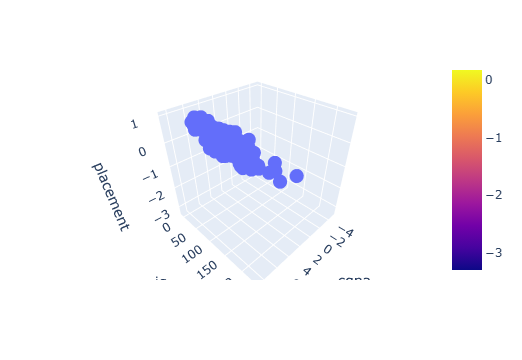

In [55]:
fig = px.scatter_3d(df, x='cgpa', y='iq', z='placement')

fig.add_trace(go.Surface(x = x, y = y, z =z ))

fig.show()